In [62]:

# import the Python Image processing Library

from PIL import Image
import os
import numpy as np

In [2]:
!ls dataset/

lagarta							 percevejo_pequeno
Manual-de-identificacao-de-pragas-e-doencas-da-soja.pdf  percevejo_verde
percevejo_marrom


In [3]:
os.listdir("dataset/lagarta/train/")

['19-206.jpg',
 'Anticarsia_gemmatalis3.jpg',
 'download.jpeg',
 'anticarsia_gemmatalis14.jpg',
 '20181019-Lagartas-Da-Soja-E-Formas-De-Controle-Lagarta-Soja.jpg',
 'csm_Anticarsia_gemmatalis_-_larvae_in_soy_8a8851d950.jpg',
 '3lagartadasoja_842x384.jpg',
 'Anticarsia_gemmatalis13.jpg',
 'image9-1-768x512.png',
 'lagarta-1.jpeg',
 'Anticarsia_gemmatalis12.jpg',
 'anticarsia_gemmatalis103.jpg']

In [17]:
# Create an Image object from an Image

def get_images(path):
    images = []
    for file in os.listdir(path):
        images.append(Image.open(path + file))
        
    return images


lagarta = get_images("dataset/lagarta/train/")
percevejo_pequeno = get_images("dataset/percevejo_pequeno/")
percevejo_marrom = get_images("dataset/percevejo_marrom/")
percevejo_verde = get_images("dataset/percevejo_verde/")

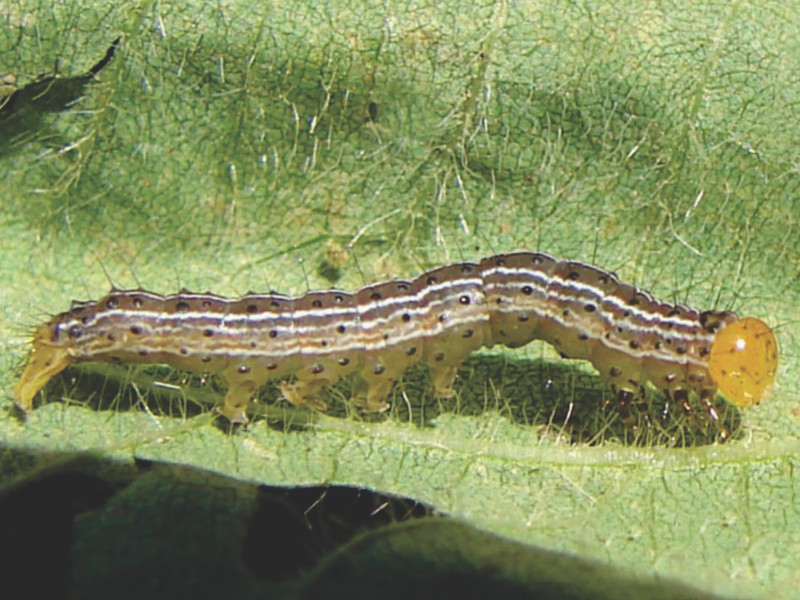

In [5]:
lagarta[0]

In [32]:
def generate_data(data, angles=[]):
    
    print("original size of files: ", len(data))
    new_data = []
    for angle in angles:
        for i, image in enumerate(data):
            new_data.append(image.rotate(angle))
    print("examples generated: ", len(new_data))
        
    return new_data


In [27]:
len(lagarta)

12

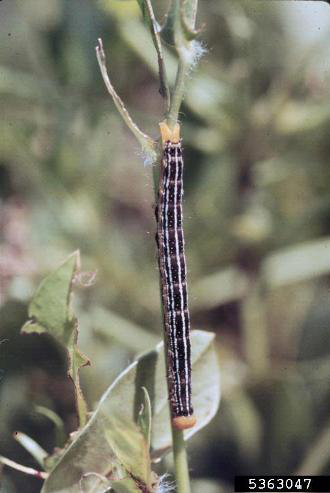

In [28]:
# lagarta.append(lagarta[3].rotate(45))
lagarta[-1]

original size of files:  12
examples generated:  24
original size of files:  10
examples generated:  20
original size of files:  10
examples generated:  20
original size of files:  16
examples generated:  32


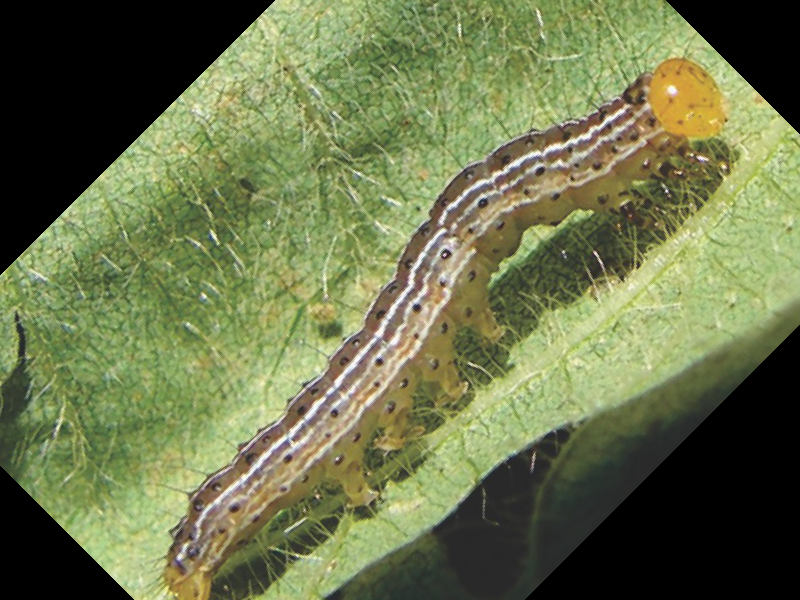

In [34]:
new_lagarta = generate_data(data=lagarta, angles=[45, 90])
new_percevejo_pequeno = generate_data(data=percevejo_pequeno, angles=[45, 90])
new_percevejo_verde = generate_data(data=percevejo_verde, angles=[45, 90])
new_percevejo_marrom = generate_data(data=percevejo_marrom, angles=[45, 90])

new_lagarta[0]

In [48]:
def save_new_examples(data, path, name):
    print(f"saving for {name}...")
    for i, image in enumerate(data):
        image.save(path + name + "_" + str(i) + ".png")
        
    print("done.")



In [49]:
# save_new_examples(new_lagarta, path="dataset/lagarta/new", name="lagarta")
save_new_examples(new_percevejo_marrom, path="dataset/percevejo_marrom/new", name="percevejo_marrom")
save_new_examples(new_percevejo_pequeno, path="dataset/percevejo_pequeno/new", name="percevejo_pequeno")
save_new_examples(new_percevejo_verde, path="dataset/percevejo_verde/new", name="percevejo_verde")

saving for percevejo_marrom
done.
saving for percevejo_pequeno
done.
saving for percevejo_verde
done.


In [57]:
os.rename("dataset/lagarta/train/anticarsia_gemmatalis14.jpg", "dataset/lagarta/test/anticarsia_gemmatalis14.jpg")

In [64]:
l = [1,22,23]
np.random.choice(l, 3)

array([23, 22,  1])

In [74]:
def split_data(folder, sample=0.1):
    files = os.listdir(folder + '/train')
    chosen = np.random.choice(files, size = round(0.1*len(files)))
    for file in chosen:
        os.rename(folder + "/train/" + file, folder + '/test/' + file)
    

In [75]:
!ls

dataset  preprocess.ipynb


In [81]:
# split_data(folder="dataset/lagarta")
split_data(folder="dataset/percevejo_marrom")
split_data(folder="dataset/percevejo_pequeno")
split_data(folder="dataset/percevejo_verde")

In [83]:
!ls dataset/percevejo_verde/test/

newpercevejo_verde_0.png   newpercevejo_verde_7.png  Nezara_viridula104.jpg
newpercevejo_verde_14.png  Nezara_viridula103.jpg
